# <font color=green> Pandas-III AI2 - Turma 5

## Missing Values

<img src="miss.png" width=800 height=800>

* **Missing Values** são valores faltantes em colunas, esses podem ser oriundos de falhas em cargas de dados, falhas em crawlers ou até mesmo corrupção de dados.

* Missing Values podem ser um problema em várias situações, como por exemplo, algoritmos de machine learning que não trabalham bem com dados faltantes.

* Estes também podem atrapalhar resultados de análises.

* Vamos aprender como encontrar missing values na base de dados e como manipular esses valores.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/aluguel.csv', sep=';')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [6]:
# coletando os dados nulos

df.isnull().sum().sort_values(ascending=False)

IPTU          10237
Condominio     4093
Valor            17
Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
dtype: int64

In [8]:
df.isna().sum().sort_values(ascending=False)

IPTU          10237
Condominio     4093
Valor            17
Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
dtype: int64

In [10]:
df.shape

(32960, 9)

In [9]:
# Qaul a porcentagem de significância dessa intância no dataFrame

(df['Valor'].isnull().sum() * 100) / df.shape[0]

0.05157766990291262

In [12]:
# Qaul a porcentagem de significância dessa intância no dataFrame

(df['IPTU'].isnull().sum() * 100) / df.shape[0]

31.05885922330097

In [13]:
# Qaul a porcentagem de significância dessa intância no dataFrame

(df['Condominio'].isnull().sum() * 100) / df.shape[0]

12.418082524271844

In [18]:
# todos os valores NaN dessa instância

df[df['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
2186,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
6598,Loja/Salão,Andaraí,0,0,0,326,NaN,NaN,1140.0
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
12683,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
13229,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0


In [20]:
df[(df['Valor'].isnull()) & (df['IPTU'].isnull()) & (df['Condominio'].isnull())]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2456,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,NaN,NaN
7302,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN


In [21]:
df.dropna()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [23]:
32960 - 21152

11808

In [24]:
(21152 * 100) /32960

64.1747572815534

## Tratando os dados (Dropping)

In [26]:
# Drop NaN em uma determinada coluna

df.dropna(subset=['Condominio'])

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [28]:
# todas as colunas com NaN

df.dropna(axis=1, how='all')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [30]:
# Qualquer coluna com dado faltante

df.dropna(axis=1, how='any')

,Tipo,Bairro,Quartos,Vagas,Suites,Area
0,Quitinete,Copacabana,1,0,0,40
1,Casa,Jardim Botânico,2,0,1,100
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150
3,Apartamento,Centro,1,0,0,15
4,Apartamento,Higienópolis,1,0,0,48
...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27
32956,Apartamento,Jacarepaguá,3,1,2,78
32957,Apartamento,São Francisco Xavier,2,1,0,48
32958,Apartamento,Leblon,2,0,0,70


In [31]:
# Qualquer linha com dado faltante

df.dropna(axis=0, how='all')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [32]:
# Qualquer linha com dado faltante

df.dropna(axis=0, how='any')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [34]:
df.dropna(thresh=8)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


## Tratando os dados (Inserting)


In [35]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [39]:
# Insert simultâneo

df.fillna(0)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,0.0


In [52]:
df.replace(np.nan, value=-10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,-10.0,-10.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,-10.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,-10.0


In [51]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [40]:
# Preenche uma determinada coluna com o valor da média

df.fillna({'IPTU':df['IPTU'].median()})

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,250.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,250.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,250.0


In [46]:
# Preenche uma determinada coluna com o valor da média

df.fillna({'Condominio':df['Condominio'].min()})

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,1.0,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [47]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [48]:
# input with ffill (anterior)

df.fillna(method='ffill')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,500.0,60.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,20.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,37.0


In [49]:
# input with bfill (posterior)

df.fillna(method='bfill')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,4020.0,1111.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,17.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,1109.0


## Interpolate

Esse método do Pandas utilizado para aplicar funções matemáticas no preenchimento de dados NaN. Trata-se de uma função poderosissima para preenchimento de dados ausentes.

In [54]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [53]:
df.interpolate(method='linear')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,2260.0,585.5
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,19.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,573.0


In [56]:
df.interpolate(method='linear', limit_direction='backward', limit=2)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,2260.0,585.5
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,19.0
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,573.0


In [57]:
df.interpolate(method='quadratic')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.000000,60.000000
1,Casa,Jardim Botânico,2,0,1,100,7000.0,4477.008936,1204.085569
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.000000,1111.000000
3,Apartamento,Centro,1,0,0,15,800.0,390.000000,20.000000
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.000000,-633.374191
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.000000,25.000000
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.000000,40.000000
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.000000,37.000000
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.000000,377.105904


In [58]:
df.interpolate(method='cubic')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.000000,60.000000
1,Casa,Jardim Botânico,2,0,1,100,7000.0,6566.938868,1533.402025
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.000000,1111.000000
3,Apartamento,Centro,1,0,0,15,800.0,390.000000,20.000000
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.000000,-697.224229
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.000000,25.000000
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.000000,40.000000
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.000000,37.000000
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.000000,351.561839


<IPython.core.display.Javascript object>


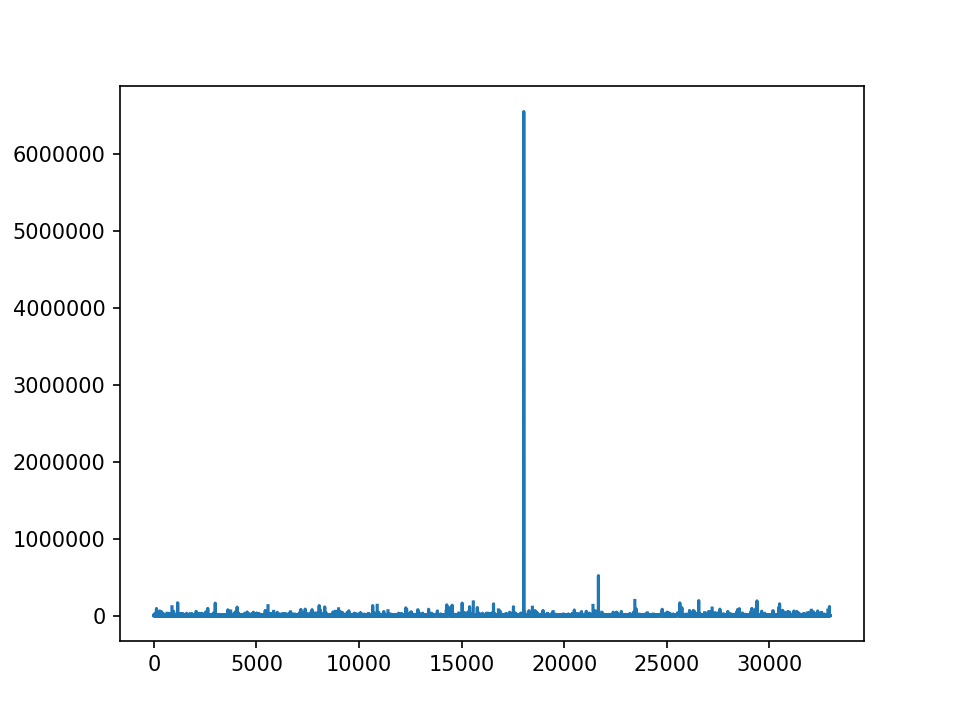

In [60]:
%matplotlib notebook
df['Condominio'].plot()

In [61]:
df['Condominio'].max()

6552570.0